## Data points graphics

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
# We define the Havriliak Negami function parameters
pi=np.pi
tauHN=0.0013
deps = 5.5
b = 0.9
c = 0.466
einf = 3.0
freqs = np.logspace(0,5,14000)
omega=2*np.pi*freqs
estar=einf + deps*(1+(1j*omega*tauHN)**b)**-c

In [202]:
# We define the Apex Capacitance parameters
e0=8.85E-12
R=10E-9
theta0=25*pi/180
h=200E-9
z=20E-9

In [203]:
# We define the apex Derivative of the Capacitance 
def CAPDER(e0,R,theta0,h,z):
    der=-2*pi*e0*R**2*(estar**2*(1-np.sin(theta0))/((h+estar*z)*(estar*R*(1-np.sin(theta0))+h+estar*z)))
    return der

In [204]:
# We define the Cantilever parameters
W=25E-6
e0=8.85E-12
alpha=15*pi/180
L=115E-6
h=200E-9
T=8E-6
A=L*W
f=2

In [205]:
# We define the derivative of the Cantilever function
def DERCANT(W,L,T,z,h):
    gamma=(L*np.sin(alpha)/(T+z))+1
    AA = W*e0*gamma*(T+z)**2
    BB = (f*np.tan(alpha)/(W*e0*np.log(gamma)))+(h/(L*W*e0*estar))
    CC = np.log(gamma)
    dercantilever=-f*L*np.sin(alpha)*np.tan(alpha)/(AA*gamma*BB*BB*CC*CC)
    return dercantilever

In [206]:
der=CAPDER(e0,R,theta0,h,z)
dercantilever=DERCANT(W,L,h,T,z)
phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi

Text(0, 0.5, 'Phase (deg)')

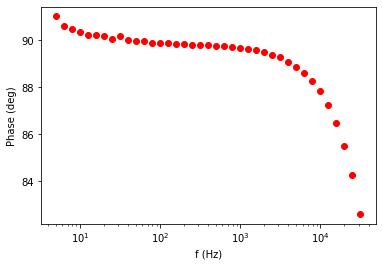

In [207]:
X , Y = [], []
for line in open('Data-TFM-JPI.TXT'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[1])

plt.semilogx(X, Y,'ro')
plt.xlabel('f (Hz)')
plt.ylabel('Phase (deg)')

Text(0, 0.5, 'Phase (deg)')

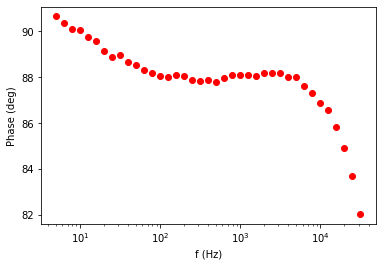

In [208]:
X, Y = [], []
for line in open('Data-TFM-JPI.TXT', 'r'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[3])

plt.semilogx(X, Y,'ro')
plt.xlabel('f (Hz)')
plt.ylabel('Phase (deg)')

Text(0, 0.5, 'Phase (deg)')

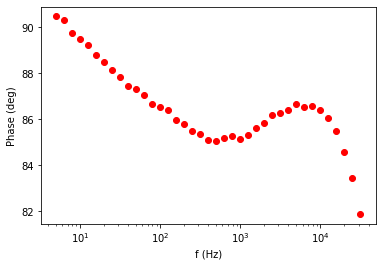

In [209]:
X, Y = [], []
for line in open('Data-TFM-JPI.TXT', 'r'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[5])

plt.semilogx(X, Y,'ro')
plt.xlabel('f (Hz)')
plt.ylabel('Phase (deg)')

Text(0, 0.5, 'Delta Phase (deg)')

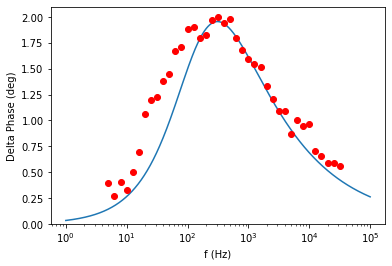

In [210]:
X , Y = [], []
for line in open('Data-TFM-JPI.TXT'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[1]-values[3])

plt.semilogx(freqs,phase)
plt.semilogx(X, Y,'ro')
plt.ylim(0,2.1)
plt.xlabel('f (Hz)')
plt.ylabel('Delta Phase (deg)')

Text(0, 0.5, 'Delta Phase (deg)')

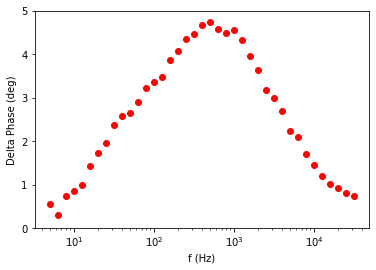

In [162]:
X , Y = [], []
for line in open('Data-TFM-JPI.TXT'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[1]-values[5])

plt.semilogx(X, Y,'ro')
plt.ylim(0,5.0)
plt.xlabel('f (Hz)')
plt.ylabel('Delta Phase (deg)')